In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


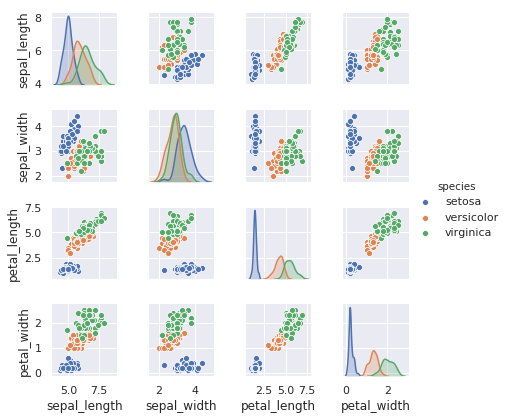

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

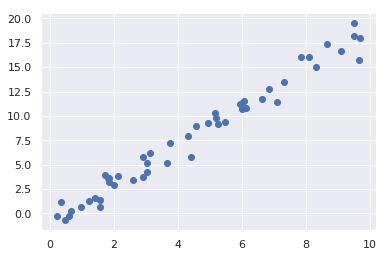

In [9]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x - 1 + rng.randn(50)
plt.scatter(x, y)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
model.coef_

array([ 1.9776566])

In [14]:
model.intercept_

-0.90331072553111458

In [15]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

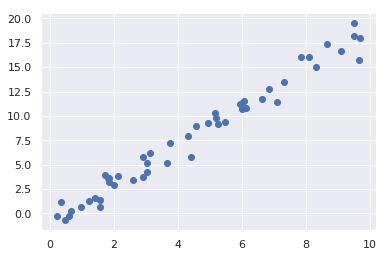

In [16]:
plt.scatter(x, y)

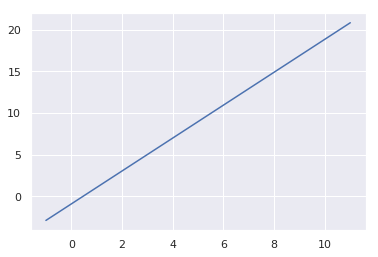

In [17]:
plt.plot(xfit, yfit)

In [19]:
# now working on Supervised Learning: Naive Bayes Classification
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(ytest, y_model)

0.97368421052631582

In [26]:
#Unsupervised learning example: Iris dimensionality

In [27]:
# using PCA
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

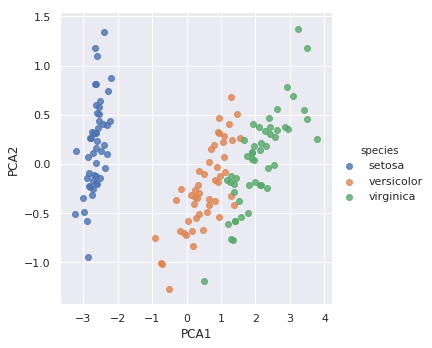

In [28]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [29]:
#Unsupervised learning example: Iris Clustering
from sklearn.mixture import GMM
model = GMM(n_components=3,covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

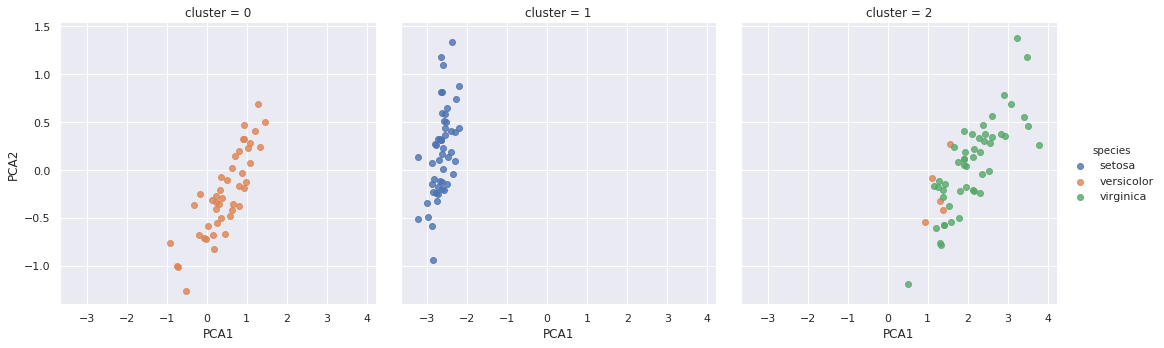

In [30]:
iris['cluster']=y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);